# Stochastic Optimization

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Stochastic vs. Deterministic

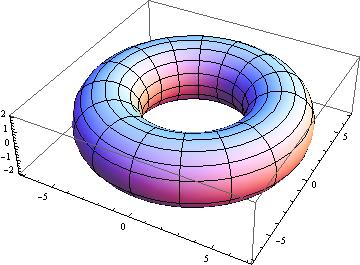

Let's imagine you are a regular at a local doughnut shop where they serve amazing doughnuts, including an assortment of awesome mini-doughnuts. You are close friends with both of the shop attendants, and no matter how many doughnuts you buy, they always throw in two mini-doughnuts into your bag. 

We can model the number of doughnuts in your bag with the following equation (where $x$ is the number of doughnuts you purchased): 

$f(x) = x + 2$

This is an example of a deterministic function. If given a specific input, $x$, our function, $f(x)$ always returns the value of $x$ plus $4$. The inputs determine the output. If you put in 2 to our equation, we will get 6. 

Now let's say a new security camera is installed by corporate, and employees shift to randomly adding two mini-doughnuts to your bag, or none at all, in response to a host of variables you can not measure (whether they remember the new cameras are there, how generous they feel that day, etc.) 

We can no longer write a deterministic function for how many doughnuts will be in your bag, because we now have these other unknown elements interfering with our direct mapping doughnut model. We know that the outcome of this random process will return either $0$ or $2$ additional doughnuts, but given the scenario I've layed out, we do not know the proability of these two options. Until we know more, we can use the variable $\epsilon$ to indicate this random element of our model:

$f(x) = x + \epsilon$

A **stochastic** function is one that includes or generates random variables. These are the two flavors we'll talk about in our conversation about stochastic optimization - models with randomness baked inside, and models that generate randomness in their optimization search processes.  

## Optimization

So, now that we have a sense now of what stochastic means, how does this relate to optimization?

Often when we're tasked with building a mathematical model in life we are also tasked with testing to see if our model performs well on some objective measure, which can be modeled by a function. This **objective function** comes to serve as our measure of how well we believe our model is doing. 

Spotting the objective function sounds pretty straightforward, and often it is, but sometimes  [footnote on multiple objective functions]

**Optimization** is about finding the best solution from all possible solutions. 

**EXAMPLES:**

* If you are a freight company, your objective function might yield the cost associated with moving a single unit of merchandise, and your optimization problem would be to find the optimal shipping parameters to reduce this cost. 

* If you are an insurance company, 

* If you are a car service app, 

For data scientist and engineers, optimization is domain that offers up a host of rich math traditions to address applied problems affecting performance of our models and software. 

Let's take a look at a 3D graph to gain a clearer grasp on how optimization works. And, just for the sake of example, let's say this graph is built on a measure of openness to new ideas assessed for two team members working together on a project. The openeness assessment asks a number of 



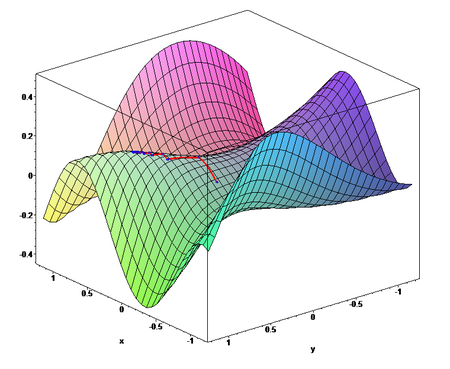

Search over the performance landscape (fitness landscape), and find the coordinate that yields the optimal value (maximum of minimum). That coordinate will give you the input values (see SGD example) 

### Maxima and Minima

If we were to visualize the landscape of possible parameters for our objective function, we may observe extrema - maxima and minima (peaks and valleys). I went to high school in North Texas, so can attest to the fact that not all landscapes have readily observable extrmea. But you could imagine that while I stare out at the "flat" grasslands of the central plains, an ant has a markedly different estimation of what is high ground and low ground.
Whether we're striding as an ant or a person, our goal in optimization is to arrive at global maxima for the function. Remember, we're looking for the absolute best paramters we can find, and don't want to get stuck on any local hilltops, or local fjords. As the nun once (could have) sung in the Sound of Music, "climb every mountain, ford every stream, follow every rainbow, till you find the optimal paramters that mimize your cost function!"

### Convex Functions
Somtimes our objective function is a convex function, and therefore if there is a local minima (the "if" is a noteworthy caveat) then it is guarenteed to be the global minima. This comes directly from the definition of a convex function, which states that "the line segment between any two points on the graph of [a convex] function lies above or on the graph". A common convex function we see in the wild is least squares, including its quadratic extension in the optimization of generalized linear models.

### Momentum
This strategy involves a host of tools for making sure don't get stuck in local extrema on our way to global extrema.

## Support Vector Machines (SVMs)

### Intuition

Isabelle Guyon discovering the kernal trick. 

FOOTNOTE: Check out the kernal trick

### Applications

* Text categorization
* Image segmentation and classification
* Classify proteins

### Definition

### Python-Sklearn

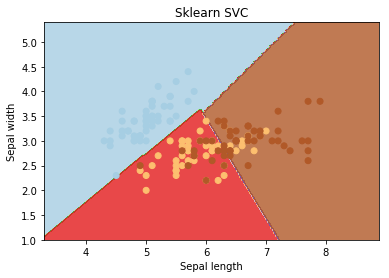

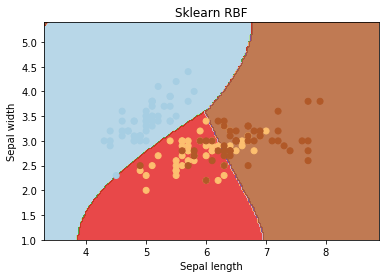

In [34]:
#sklearn

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

svc1 = svm.SVC(C=1.0, gamma='auto', kernel='linear')
svc2 = svm.SVC(C=1.0, gamma='auto', kernel='rbf')
svc1.fit(X, y)
svc2.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Sklearn SVC')
plt.show()

Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Sklearn RBF')
plt.show()

### Python - Spark

In [37]:
#spark
# From Spark documnetation: http://spark.apache.org/docs/2.2.0/mllib-linear-methods.html#linear-support-vector-machines-svms

from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(' ')]
    return LabeledPoint(values[0], values[1:])

data = sc.textFile("data/mllib/sample_svm_data.txt")
parsedData = data.map(parsePoint)

# Build the model
model = SVMWithSGD.train(parsedData, iterations=100)

# Evaluating the model on training data
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda lp: lp[0] != lp[1]).count() / float(parsedData.count())
print("Training Error = " + str(trainErr))

# Save and load model
model.save(sc, "target/tmp/pythonSVMWithSGDModel")
sameModel = SVMModel.load(sc, "target/tmp/pythonSVMWithSGDModel")

NameError: name 'sc' is not defined

### Resources

* Implementing in R: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

## Stochastic Gradient Descent (SGD)

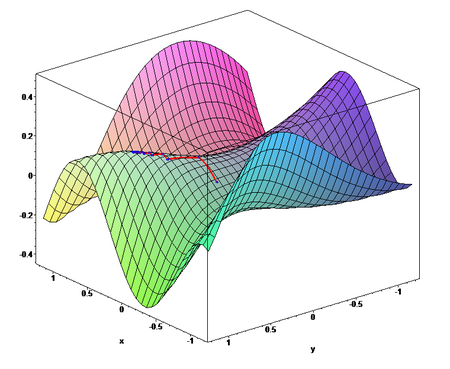

### Intuition

Wait, we've already seen this graphic before! It has come back to help us build our intuition of how stochastic gradient descent works. As we explorerd earlier, we can imagine the objective function output we are looking to optimize is on the $Z$ axis, and that the input variables our objective function lie on the $X$ and $Y$ axes. 

We'll remember that in traditional gradient descent we calculate the gradient (the vector of all the partial derivatives for a given point), and move in the opposite direction of the steepest differential (aka - we descend). So how does *stochastic* gradient descent differ?

The "stochastic part" is a random shuffling of the order of training data to be serached over in the iterative gradient updating. 

Do we know if we're ever going to get there? From Wikipeida "when the learning rates decrease with an appropriate rate, and subject to relatively mild assumptions, stochastic gradient descent converges almost surely to a global minimum when the objective function is convex or pseudoconvex, and otherwise converges almost surely to a local minimum". For those of you interested in why this is so, I encourage you to check out: Robbins-Siegmund paper from 1971. 

### Definition

Choose an initial vector of parameters {\displaystyle w} w and learning rate {\displaystyle \eta } \eta 

Repeat until an approximate minimum is obtained:
* Randomly shuffle examples in the training set.

For ${\displaystyle i=1,2,...,n} {\displaystyle i=1,2,...,n}$, do:
* ${\displaystyle \!w:=w-\eta \nabla Q_{i}(w).} \!w:=w-\eta \nabla Q_{i}(w)$.

### Python - Sklearn

In [1]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import numpy as np
from sklearn import linear_model

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
clf = linear_model.SGDClassifier()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

[1]


/Users/siobhan/anaconda/envs/ipykernel_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Simulated Annealing

### Intuition

Let's explore another method for optimizing SVMs that also involves a random variable. This technique attempts to find a global optimum, and was inspired by temperature regulation in metullurgy. 


* More useful in discrete data contexts


### Pseudocode

Let s = s0

For k = 0 through kmax (exclusive):
* T ← temperature(k ∕ kmax)
* Pick a random neighbour, snew ← neighbour(s)

If P(E(s), E(snew), T) ≥ random(0, 1):
* s ← snew

Output: the final state s

### CODE: Scipy

In [41]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.anneal.html

from scipy import optimize
np.random.seed(777)  # Seeded to allow replication.
x0 = np.array([2., 2.]) #Seeds a guess
params = (2, 3, 7, 8, 9, 10, 44, -1, 2, 26, 1, -2, 0.5)

myopts = {'C'     : 'boltzmann',   # Non-default value.
          'gamma' : None,  # Default, formerly `maxeval`.
         }
          
res2 = optimize.minimize(f, x0, args=params, method='Anneal', options=myopts)

NameError: name 'params' is not defined

### CODE: Skyler

In [42]:
#https://github.com/skylergrammer/SimulatedAnnealing

## Particle Swarm Optimization

### Psuedocode

 for each particle i = 1, ..., S do:
   * Initialize the particle's position with a uniformly distributed random vector: xi ~ U(blo, bup)
   * Initialize the particle's best known position to its initial position: pi ← xi
   
   if f(pi) < f(g) then
       update the swarm's best known  position: g ← pi
   Initialize the particle's velocity: vi ~ U(-|bup-blo|, |bup-blo|)
   
while a termination criterion is not met do:
   * for each particle i = 1, ..., S do
   
      for each dimension d = 1, ..., n do
         Pick random numbers: rp, rg ~ U(0,1)
         Update the particle's velocity: vi,d ← ω vi,d + φp rp (pi,d-xi,d) + φg rg (gd-xi,d)
      Update the particle's position: xi ← xi + vi
      if f(xi) < f(pi) then
         Update the particle's best known position: pi ← xi
         if f(pi) < f(g) then
            Update the swarm's best known position: g ← pi

### CODE: Pyswarms

In [ ]:
import pyswarms




## Resources